In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier,Perceptron,Lasso,Ridge,ElasticNet
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc,roc_auc_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('2軍野手詳細.csv')
df

,RANK,NAME,TEAM,LEVEL,AVG,GAME,AT,SC,HIT,1B,...,SecA,TA,HRP,SOP,BBP,PSN,BB/K,P-S,BR,wOBA
0,1,山下 航汰,巨人,2,0.331,73,248,38,82,55,...,0.214,0.762,49.6,8.15,15.82,5,0.52,0,9.985,0.380297
1,2,田城 飛翔,ソフトバンク,2,0.323,88,279,37,90,75,...,0.129,0.637,93,8.25,27.00,4.36,0.31,3,2.008,0.337585
2,3,石川 駿,中日,2,0.317,69,246,26,78,57,...,0.179,0.723,49.2,7.22,22.25,1.67,0.32,1.666666667,6.717,0.353910
3,4,コラス,ソフトバンク,2,0.316,54,206,31,65,39,...,0.306,0.871,22.89,4.52,12.56,4.5,0.36,0,12.059,0.385200
4,4,西野 真弘,オリックス,1,0.316,40,117,10,37,31,...,0.197,0.721,-,12.36,8.50,0,1.45,0,2.990,0.356370
5,6,モヤ,中日,1,0.315,56,203,26,64,43,...,0.266,0.833,16.92,5.07,19.82,0,0.26,0,10.040,0.380321
6,7,塩見 泰隆,ヤクルト,2,0.312,61,205,39,64,40,...,0.512,1.132,17.08,6.33,5.88,14.71,1.08,1.846153846,22.497,0.428095
7,7,関根 大気,DeNA,2,0.312,57,199,40,62,41,...,0.372,0.965,24.88,8.32,7.52,6.86,1.11,1.777777778,15.162,0.404372
8,9,石川 慎吾,巨人,1,0.310,42,129,17,40,30,...,0.194,0.739,43,6.13,17.63,1.5,0.35,0,3.355,0.347872
9,10,大村 孟,ヤクルト,2,0.309,65,175,19,54,48,...,0.183,0.667,175,11.05,9.55,1.6,1.16,1.833333333,2.309,0.336281


In [116]:
df = df.replace('-',np.nan)
df = df.dropna(how='any')
df

,RANK,NAME,TEAM,LEVEL,AVG,GAME,AT,SC,HIT,1B,...,SecA,TA,HRP,SOP,BBP,PSN,BB/K,P-S,BR,wOBA
0,1,山下 航汰,巨人,2,0.331,73,248,38,82,55,...,0.214,0.762,49.6,8.15,15.82,5,0.52,0,9.985,0.380297
1,2,田城 飛翔,ソフトバンク,2,0.323,88,279,37,90,75,...,0.129,0.637,93,8.25,27.00,4.36,0.31,3,2.008,0.337585
2,3,石川 駿,中日,2,0.317,69,246,26,78,57,...,0.179,0.723,49.2,7.22,22.25,1.67,0.32,1.666666667,6.717,0.353910
3,4,コラス,ソフトバンク,2,0.316,54,206,31,65,39,...,0.306,0.871,22.89,4.52,12.56,4.5,0.36,0,12.059,0.385200
5,6,モヤ,中日,1,0.315,56,203,26,64,43,...,0.266,0.833,16.92,5.07,19.82,0,0.26,0,10.040,0.380321
6,7,塩見 泰隆,ヤクルト,2,0.312,61,205,39,64,40,...,0.512,1.132,17.08,6.33,5.88,14.71,1.08,1.846153846,22.497,0.428095
7,7,関根 大気,DeNA,2,0.312,57,199,40,62,41,...,0.372,0.965,24.88,8.32,7.52,6.86,1.11,1.777777778,15.162,0.404372
8,9,石川 慎吾,巨人,1,0.310,42,129,17,40,30,...,0.194,0.739,43,6.13,17.63,1.5,0.35,0,3.355,0.347872
9,10,大村 孟,ヤクルト,2,0.309,65,175,19,54,48,...,0.183,0.667,175,11.05,9.55,1.6,1.16,1.833333333,2.309,0.336281
10,11,松原 聖弥,巨人,2,0.304,67,214,43,65,53,...,0.201,0.647,53.5,7.21,9.80,6,0.74,4.444444444,0.809,0.347125


In [117]:
x = df.drop(['RANK','NAME','TEAM','LEVEL'],axis=1)
x

,AVG,GAME,AT,SC,HIT,1B,2B,3B,HR,BH,...,SecA,TA,HRP,SOP,BBP,PSN,BB/K,P-S,BR,wOBA
0,0.331,73,248,38,82,55,18,4,5,123,...,0.214,0.762,49.6,8.15,15.82,5,0.52,0,9.985,0.380297
1,0.323,88,279,37,90,75,8,4,3,115,...,0.129,0.637,93,8.25,27.00,4.36,0.31,3,2.008,0.337585
2,0.317,69,246,26,78,57,14,2,5,111,...,0.179,0.723,49.2,7.22,22.25,1.67,0.32,1.666666667,6.717,0.353910
3,0.316,54,206,31,65,39,16,1,9,110,...,0.306,0.871,22.89,4.52,12.56,4.5,0.36,0,12.059,0.385200
5,0.315,56,203,26,64,43,9,0,12,109,...,0.266,0.833,16.92,5.07,19.82,0,0.26,0,10.040,0.380321
6,0.312,61,205,39,64,40,10,2,12,114,...,0.512,1.132,17.08,6.33,5.88,14.71,1.08,1.846153846,22.497,0.428095
7,0.312,57,199,40,62,41,8,5,8,104,...,0.372,0.965,24.88,8.32,7.52,6.86,1.11,1.777777778,15.162,0.404372
8,0.310,42,129,17,40,30,7,0,3,56,...,0.194,0.739,43,6.13,17.63,1.5,0.35,0,3.355,0.347872
9,0.309,65,175,19,54,48,5,0,1,62,...,0.183,0.667,175,11.05,9.55,1.6,1.16,1.833333333,2.309,0.336281
10,0.304,67,214,43,65,53,5,3,4,88,...,0.201,0.647,53.5,7.21,9.80,6,0.74,4.444444444,0.809,0.347125


In [118]:
y = df[['LEVEL']]
y

,LEVEL
0,2
1,2
2,2
3,2
5,1
6,2
7,2
8,1
9,2
10,2


In [119]:
sc = StandardScaler()
x_std = sc.fit_transform(x)
pd.DataFrame(x_std,columns=x.columns)

,AVG,GAME,AT,SC,HIT,1B,2B,3B,HR,BH,...,SecA,TA,HRP,SOP,BBP,PSN,BB/K,P-S,BR,wOBA
0,2.226166,0.784581,1.107728,1.626710,2.250022,1.839134,2.372259,1.885880,0.252255,2.070986,...,-0.273752,0.891409,-0.437137,1.575945,0.460629,0.722517,0.161728,-0.988534,1.493491,1.705130
1,2.002331,1.835207,1.708900,1.516785,2.781330,3.583323,-0.159239,1.885880,-0.349276,1.745663,...,-1.452408,-0.007013,0.339947,1.636055,2.504605,0.473022,-0.755788,0.701669,0.484960,0.676631
2,1.834454,0.504414,1.068942,0.307612,1.984369,2.013553,1.359659,0.424323,0.252255,1.583001,...,-0.759081,0.611101,-0.444299,1.016923,1.636190,-0.575637,-0.712097,-0.049533,1.080319,1.069725
3,1.806475,-0.546213,0.293236,0.857236,1.120994,0.443783,1.865959,-0.306456,1.455316,1.542335,...,1.001969,1.674833,-0.915384,-0.606043,-0.135378,0.527599,-0.537332,-0.988534,1.755707,1.823183
4,1.778496,-0.406129,0.235058,0.307612,1.054581,0.792621,0.093910,-1.037234,2.357613,1.501670,...,0.447308,1.401712,-1.022278,-0.275439,1.191926,-1.226664,-0.974245,-0.988534,1.500445,1.705701
5,1.694558,-0.055920,0.273843,1.736635,1.054581,0.530993,0.347060,0.424323,2.357613,1.704997,...,3.858477,3.550738,-1.019413,0.481945,-1.356645,4.507827,2.608439,0.051591,3.075382,2.856086
6,1.694558,-0.336087,0.157487,1.846559,0.921754,0.618202,-0.159239,2.616659,1.154551,1.298343,...,1.917161,2.350446,-0.879753,1.678131,-1.056813,1.447613,2.739513,0.013067,2.148019,2.284845
7,1.638599,-1.386714,-1.199999,-0.681711,-0.539341,-0.341101,-0.412389,-1.037234,-0.349276,-0.653599,...,-0.551083,0.726099,-0.555311,0.361726,0.791541,-0.641909,-0.581023,-0.988534,0.655261,0.924345
8,1.610619,0.224247,-0.307937,-0.461861,0.390447,1.228668,-0.918689,-1.037234,-0.950807,-0.409606,...,-0.703615,0.208608,1.808171,3.319130,-0.685680,-0.602926,2.957969,0.044368,0.523016,0.645240
9,1.470723,0.364330,0.448377,2.176334,1.120994,1.664715,-0.918689,1.155102,-0.048511,0.647696,...,-0.454017,0.064860,-0.367307,1.010912,-0.639974,1.112354,1.122936,1.515470,0.333371,0.906350


In [120]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.25)

In [121]:
clf_rf_1 = RandomForestClassifier()
clf_rf_1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
pre_rf_1 = clf_rf_1.predict(x_test)
acc_rf_1 = accuracy_score(y_test,pre_rf_1) 
auc_rf_1 = roc_auc_score(y_test,pre_rf_1)
score_name = ['正解率','ＡＵＣ']
score_list = [acc_rf_1,auc_rf_1]
print('\t初回ランダムフォレスト')
for i in range(2):
    print('\t{0:5s} : {1:>.6f}'.format(score_name[i],score_list[i]))

	初回ランダムフォレスト
	正解率   : 0.774194
	ＡＵＣ   : 0.461538


In [123]:
imp_rf_1 = clf_rf_1.feature_importances_
print('\t初回ランダムフォレスト')
for i,feat in enumerate(x.columns):
    print('\t{0:5s} : {1:>.6f}'.format(feat,imp_rf_1[i]))
          

	初回ランダムフォレスト
	AVG   : 0.022501
	GAME  : 0.021621
	AT    : 0.006939
	SC    : 0.039720
	HIT   : 0.017065
	1B    : 0.013834
	2B    : 0.017099
	3B    : 0.000000
	HR    : 0.017957
	BH    : 0.034352
	RBI   : 0.028693
	SB    : 0.024920
	CS    : 0.020222
	BT    : 0.036286
	SF    : 0.009423
	BB    : 0.009368
	ABB   : 0.013778
	DB    : 0.001883
	SO    : 0.033307
	DP    : 0.007971
	OBP   : 0.051232
	SRG   : 0.051830
	OPS   : 0.037245
	NOI   : 0.022129
	GPA   : 0.003974
	IsoP  : 0.031054
	IsoD  : 0.038275
	RC    : 0.013530
	RC27  : 0.005306
	XR    : 0.008745
	XR27  : 0.009507
	BABIP : 0.038776
	SecA  : 0.041070
	TA    : 0.000000
	HRP   : 0.074325
	SOP   : 0.071282
	BBP   : 0.013401
	PSN   : 0.020412
	BB/K  : 0.035448
	P-S   : 0.018688
	BR    : 0.014328
	wOBA  : 0.022507


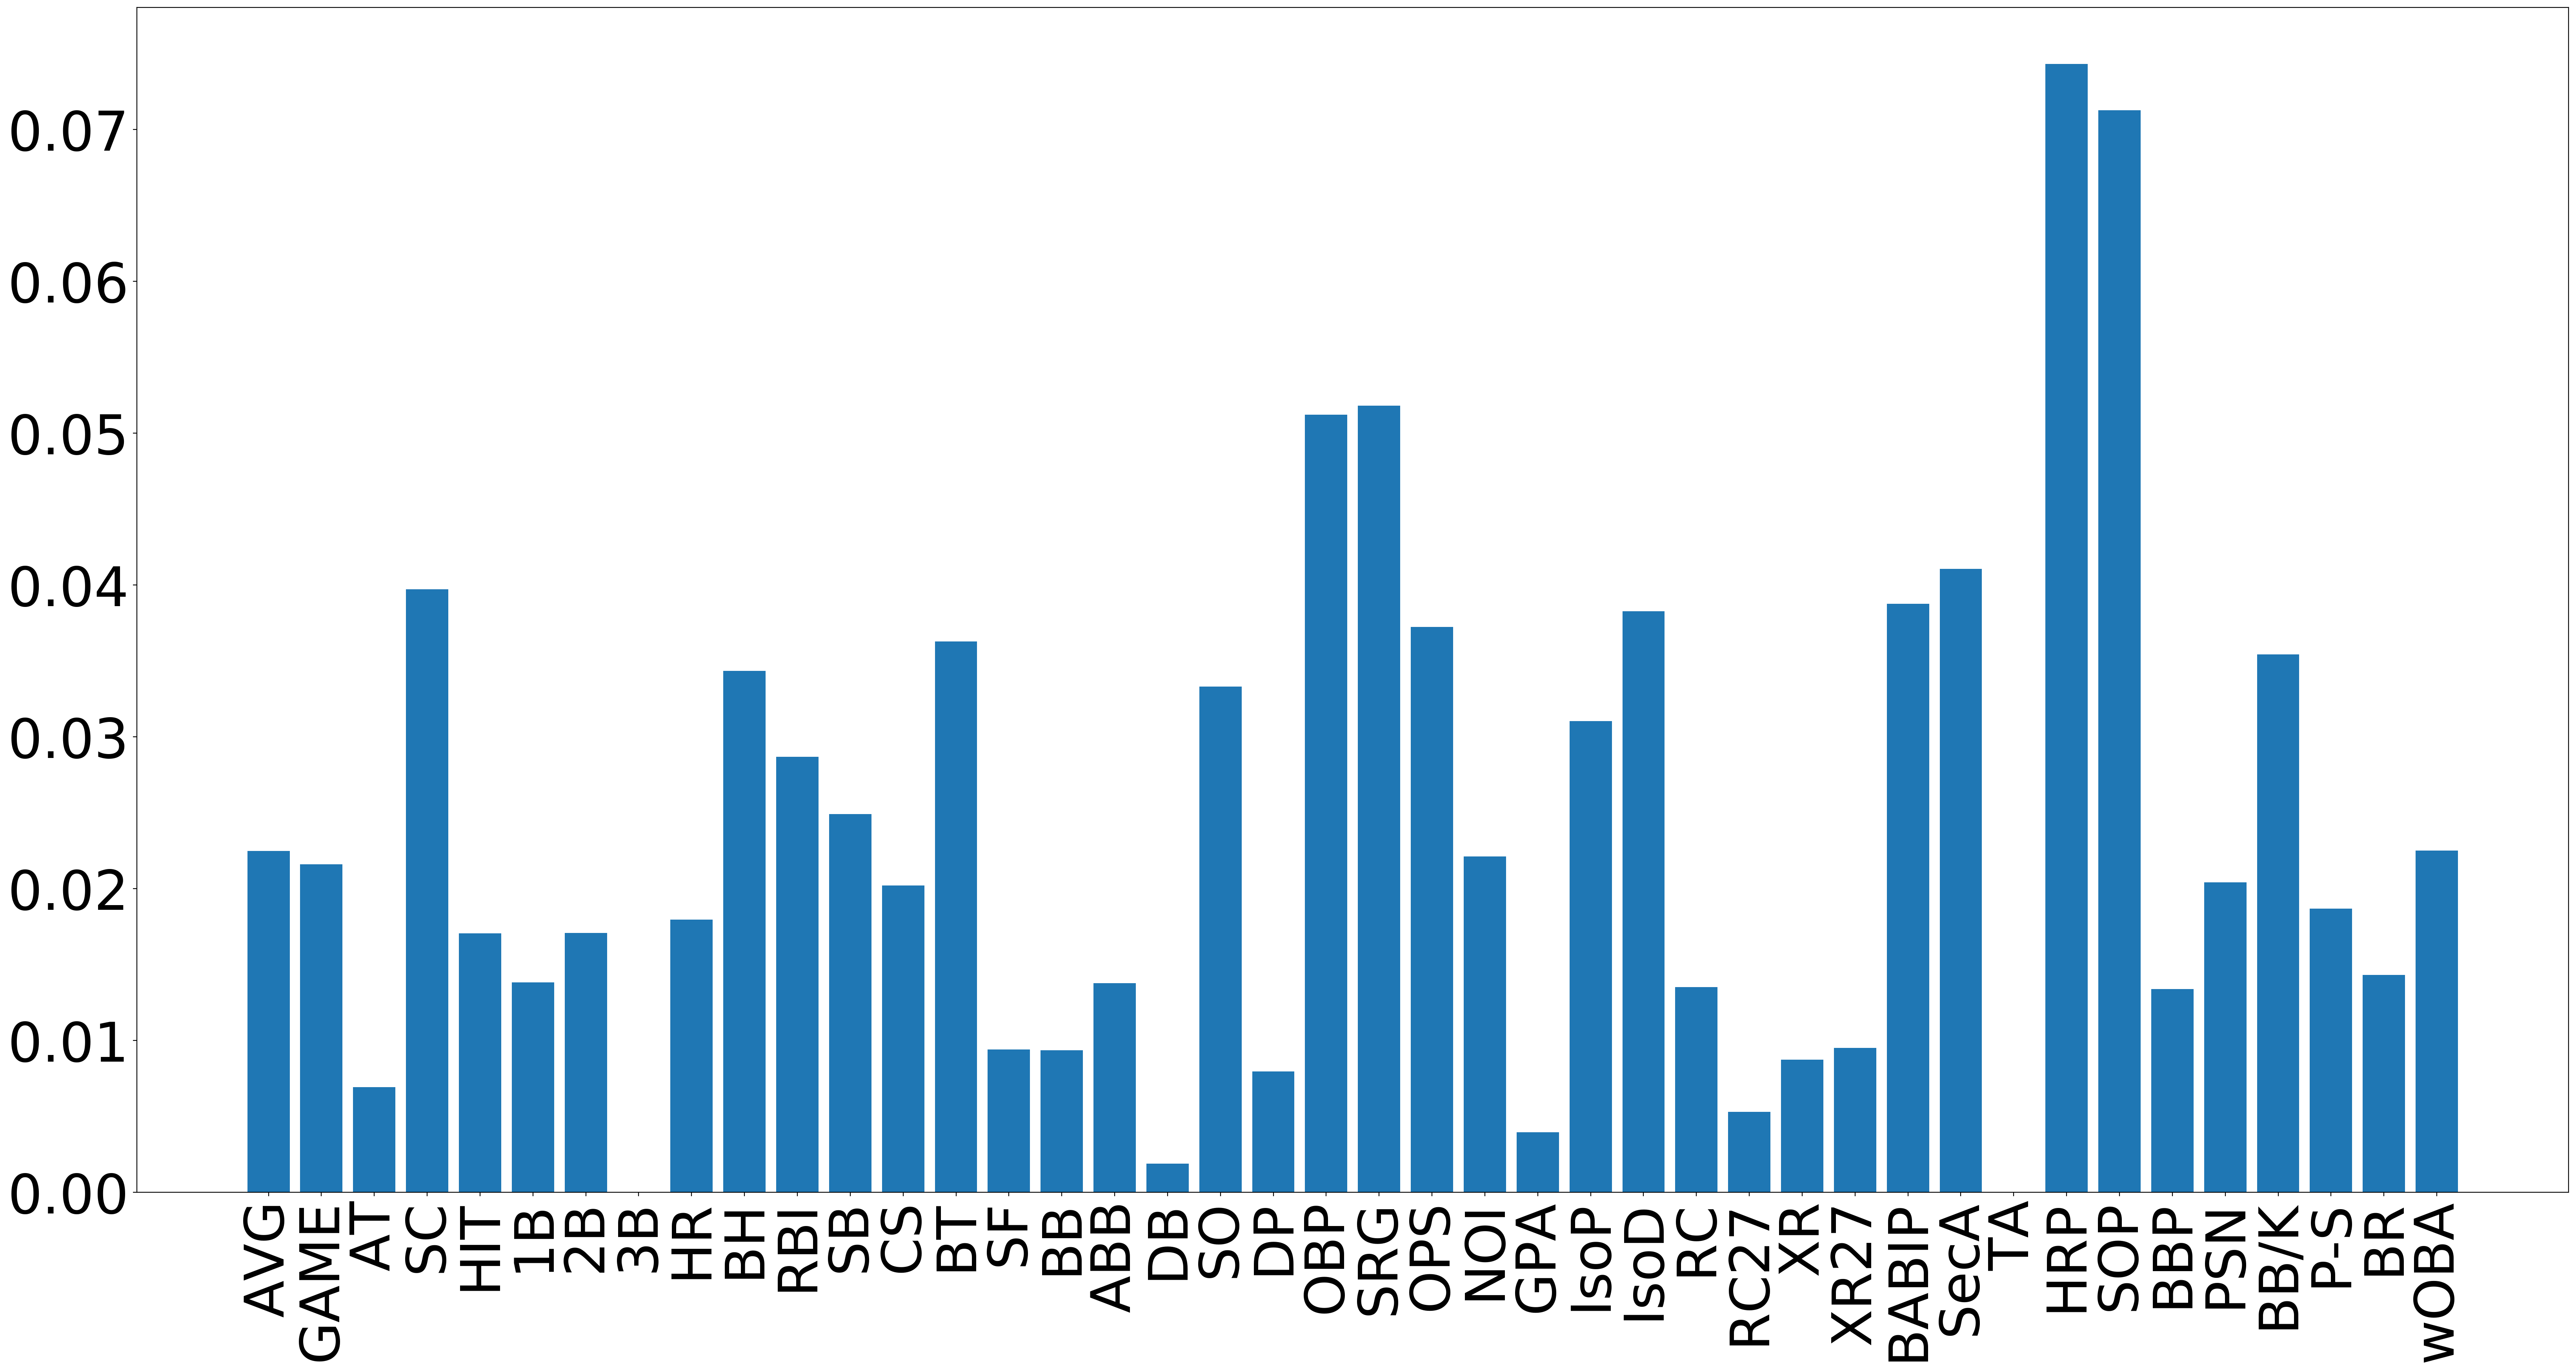

In [124]:
plt.figure(figsize=(40,20),dpi=200)
plt.bar(x.columns,clf_rf_1.feature_importances_,align='center')
plt.xticks(rotation=90)
plt.tick_params(labelsize=50)

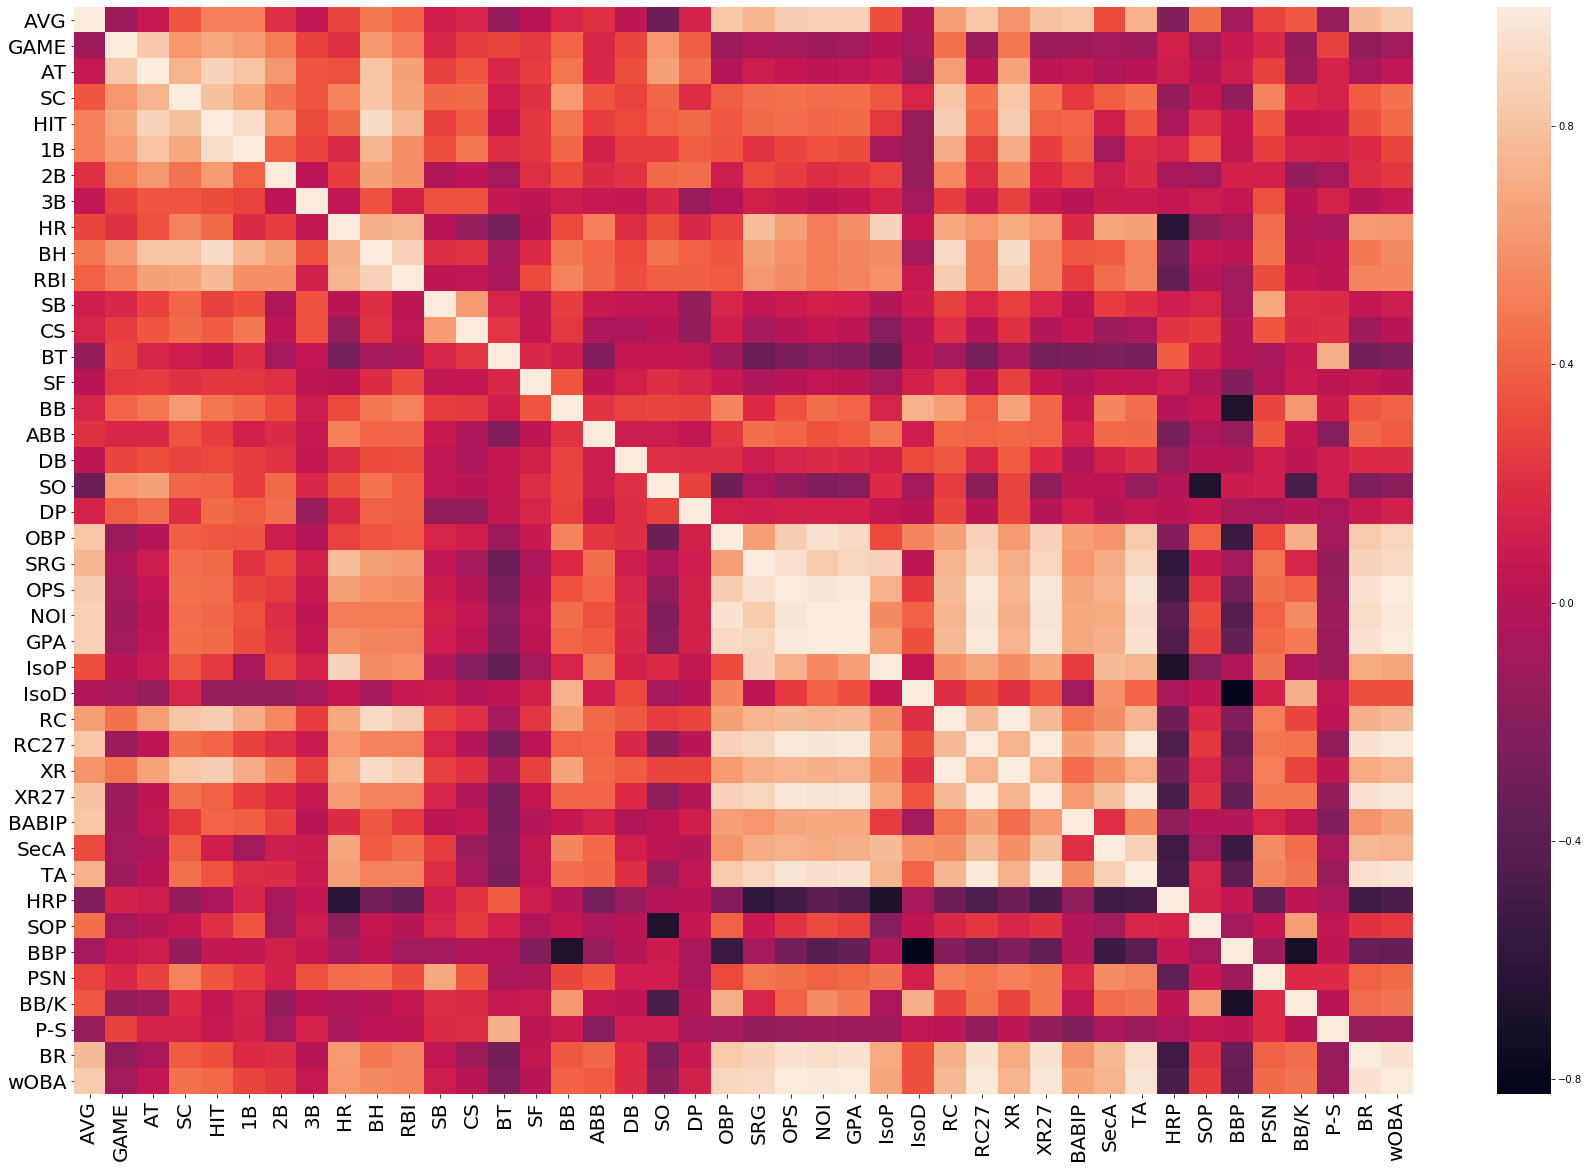

In [125]:
plt.figure(figsize=(30,20))
sns.heatmap(np.corrcoef(x_std.transpose()),xticklabels=x.columns,yticklabels=x.columns)
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)

In [126]:
pca = PCA()
x_pc = pca.fit_transform(x_std)

In [127]:
pd.DataFrame(x_pc,columns=['pc{}'.format(x+1) for x in range(len(x.columns))])

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42
0,6.852034,1.845909,0.243367,4.215648,0.310184,-0.901203,0.415079,0.559407,-0.414473,-0.934066,...,-0.005473,0.012341,0.005869,0.003424,-0.001377,-0.003826,-1.594659e-04,-2.278513e-16,1.771100e-15,-2.621367e-16
1,3.715180,4.528340,0.768501,5.639984,0.702034,0.872501,0.632548,1.403555,-0.261792,-0.748554,...,0.001953,0.009154,0.001583,-0.005573,-0.003535,0.000474,1.847787e-04,2.025280e-15,-4.286485e-17,-1.821603e-16
2,4.456899,1.927763,-1.258946,3.763762,-1.989101,1.223100,0.368239,1.055469,-1.328226,0.233401,...,0.011539,-0.004965,-0.006457,0.002736,0.002618,-0.002563,2.537237e-04,-1.414461e-15,-1.242441e-15,1.187892e-16
3,7.421312,-0.682592,-2.995515,1.328298,-0.238730,-0.990211,-0.922632,-1.711084,0.067559,0.322101,...,-0.010716,0.010354,-0.000510,0.002147,0.001922,-0.003092,3.657292e-05,-2.002270e-16,-9.255996e-18,1.791237e-15
4,5.770454,-1.015822,-3.657350,2.384048,-0.976187,0.739100,-0.586365,-0.857997,-0.912708,0.070912,...,0.005527,-0.001469,-0.002602,-0.003376,0.001175,-0.003109,-2.901032e-04,-5.473752e-16,3.910449e-16,5.208141e-17
5,12.894868,-1.861218,2.199940,-1.975623,3.118368,-0.464089,-0.579182,0.697412,1.302948,0.623138,...,0.012579,-0.012881,-0.002205,-0.002192,0.005547,-0.001737,9.979764e-05,5.296283e-16,3.322189e-16,7.962649e-16
6,9.450927,-2.177580,1.655727,0.061134,2.168839,-0.359782,1.516722,-0.335929,-0.698526,-2.129383,...,-0.008371,0.005877,0.002900,0.000580,0.001169,-0.000817,-1.206675e-04,-2.984283e-16,1.050359e-16,-6.126013e-16
7,1.036115,-3.873625,-1.356051,2.832284,-1.073943,0.254404,-0.714533,0.686834,-0.687783,0.669053,...,0.007242,0.000690,-0.005303,0.002461,0.000320,0.003095,-1.705993e-04,3.706332e-16,1.107075e-17,-1.257834e-16
8,0.904791,-1.512231,5.009874,2.667467,-2.504402,1.628569,1.091790,0.165659,1.878485,-0.561996,...,-0.006596,0.010956,-0.001825,-0.003607,0.000090,0.000737,-1.633259e-04,1.912136e-16,-2.286926e-16,5.493575e-17
9,3.349765,1.211167,3.935910,2.357254,3.406330,-0.334958,-1.115889,-0.540420,0.583826,-0.559361,...,-0.009834,0.000531,-0.002645,0.001580,0.003401,0.002142,2.613443e-05,1.225020e-16,-2.383956e-16,6.469782e-17


In [128]:
pd.DataFrame(pca.components_,index=['pc{}'.format(x+1) for x in range(len(x.columns))],columns=x.columns).head(5)

,AVG,GAME,AT,SC,HIT,1B,2B,3B,HR,BH,...,SecA,TA,HRP,SOP,BBP,PSN,BB/K,P-S,BR,wOBA
pc1,0.186411,0.043708,0.083666,0.165130,0.159030,0.120195,0.096093,0.041600,0.174383,0.188174,...,0.181474,0.225944,-0.110959,0.046801,-0.080197,0.134104,0.100727,-0.018473,0.218080,0.228966
pc2,-0.081888,0.331736,0.352233,0.216353,0.265894,0.254124,0.200114,0.124188,0.038871,0.224543,...,-0.116815,-0.124621,0.094431,-0.054916,0.105295,0.045841,-0.133880,0.103731,-0.144211,-0.116445
pc3,0.055129,0.024418,0.013382,0.065616,0.031358,0.148218,-0.122651,0.055004,-0.246074,-0.094193,...,-0.026306,-0.010558,0.240291,0.287067,-0.261501,0.023632,0.373779,0.140436,-0.029685,0.003155
pc4,0.330563,-0.070410,0.007180,-0.046039,0.155325,0.231706,0.038078,0.041454,-0.157983,0.041756,...,-0.294912,-0.045920,0.128112,0.266960,0.317122,-0.067530,-0.090897,-0.073101,0.015546,0.057846
pc5,-0.059160,-0.042181,-0.034246,0.108963,-0.054392,-0.059691,-0.208492,0.316938,0.076804,-0.000370,...,0.124632,0.043506,-0.116532,-0.015932,0.131203,0.420887,-0.067915,0.205029,-0.030143,-0.021661


In [129]:
pd.DataFrame(pca.explained_variance_ratio_,index=['pc{}'.format(x+1) for x in range(len(x.columns))],columns=['varince ratio'])

,varince ratio
pc1,4.007610e-01
pc2,1.603448e-01
pc3,9.444014e-02
pc4,7.107777e-02
pc5,5.669092e-02
pc6,3.493114e-02
pc7,2.841863e-02
pc8,2.244560e-02
pc9,2.047605e-02
pc10,1.837111e-02


In [130]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_),index=['pc{}'.format(x+1) for x in range(len(x.columns))],columns=['sum varince ratio'])

,sum varince ratio
pc1,0.400761
pc2,0.561106
pc3,0.655546
pc4,0.726624
pc5,0.783315
pc6,0.818246
pc7,0.846664
pc8,0.869110
pc9,0.889586
pc10,0.907957


In [131]:
pd.DataFrame(pca.explained_variance_,index=['pc{}'.format(x+1) for x in range(len(x.columns))],columns=['varince'])

,varince
pc1,1.696881e+01
pc2,6.789235e+00
pc3,3.998734e+00
pc4,3.009537e+00
pc5,2.400377e+00
pc6,1.479036e+00
pc7,1.203286e+00
pc8,9.503794e-01
pc9,8.669860e-01
pc10,7.778597e-01


In [132]:
x_pc_1 = pd.DataFrame(x_pc,columns=['pc{}'.format(x+1) for x in range(len(x.columns))])
x_pc_1 = x_pc_1[['pc1','pc2','pc3','pc4','pc5','pc6']]
x_pc_1

,pc1,pc2,pc3,pc4,pc5,pc6
0,6.852034,1.845909,0.243367,4.215648,0.310184,-0.901203
1,3.715180,4.528340,0.768501,5.639984,0.702034,0.872501
2,4.456899,1.927763,-1.258946,3.763762,-1.989101,1.223100
3,7.421312,-0.682592,-2.995515,1.328298,-0.238730,-0.990211
4,5.770454,-1.015822,-3.657350,2.384048,-0.976187,0.739100
5,12.894868,-1.861218,2.199940,-1.975623,3.118368,-0.464089
6,9.450927,-2.177580,1.655727,0.061134,2.168839,-0.359782
7,1.036115,-3.873625,-1.356051,2.832284,-1.073943,0.254404
8,0.904791,-1.512231,5.009874,2.667467,-2.504402,1.628569
9,3.349765,1.211167,3.935910,2.357254,3.406330,-0.334958


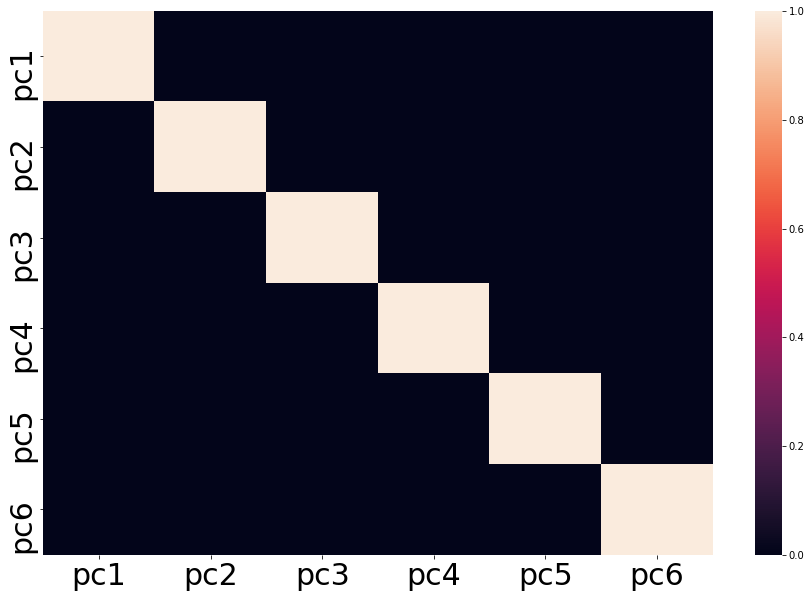

In [133]:
plt.figure(figsize=(15,10))
sns.heatmap(np.corrcoef(x_pc_1.transpose()),xticklabels=x_pc_1.columns,yticklabels=x_pc_1.columns)
plt.tick_params(labelsize=30)

In [134]:
x_train_pc_1,x_test_pc_1,y_train_pc_1,y_test_pc_1=train_test_split(x_pc_1,y,test_size=0.25)

In [135]:
clf_rf_pc_1 = RandomForestClassifier()
clf_rf_pc_1.fit(x_train_pc_1,y_train_pc_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [136]:
pre_rf_pc_1 = clf_rf_pc_1.predict(x_test_pc_1)
acc_rf_pc_1 = accuracy_score(y_test_pc_1,pre_rf_pc_1)
auc_rf_pc_1 = roc_auc_score(y_test_pc_1,pre_rf_pc_1)
score_list_1 = [acc_rf_pc_1,auc_rf_pc_1]
for i in range(2):
    print('\t{0:5s} : {1:>.6f}'.format(score_name[i],score_list_1[i]))
    

	正解率   : 0.741935
	ＡＵＣ   : 0.588384


In [137]:
x_pc_2 = pd.concat([pd.DataFrame(x_std,columns=x.columns),x_pc_1],axis=1)
x_pc_2

,AVG,GAME,AT,SC,HIT,1B,2B,3B,HR,BH,...,BB/K,P-S,BR,wOBA,pc1,pc2,pc3,pc4,pc5,pc6
0,2.226166,0.784581,1.107728,1.626710,2.250022,1.839134,2.372259,1.885880,0.252255,2.070986,...,0.161728,-0.988534,1.493491,1.705130,6.852034,1.845909,0.243367,4.215648,0.310184,-0.901203
1,2.002331,1.835207,1.708900,1.516785,2.781330,3.583323,-0.159239,1.885880,-0.349276,1.745663,...,-0.755788,0.701669,0.484960,0.676631,3.715180,4.528340,0.768501,5.639984,0.702034,0.872501
2,1.834454,0.504414,1.068942,0.307612,1.984369,2.013553,1.359659,0.424323,0.252255,1.583001,...,-0.712097,-0.049533,1.080319,1.069725,4.456899,1.927763,-1.258946,3.763762,-1.989101,1.223100
3,1.806475,-0.546213,0.293236,0.857236,1.120994,0.443783,1.865959,-0.306456,1.455316,1.542335,...,-0.537332,-0.988534,1.755707,1.823183,7.421312,-0.682592,-2.995515,1.328298,-0.238730,-0.990211
4,1.778496,-0.406129,0.235058,0.307612,1.054581,0.792621,0.093910,-1.037234,2.357613,1.501670,...,-0.974245,-0.988534,1.500445,1.705701,5.770454,-1.015822,-3.657350,2.384048,-0.976187,0.739100
5,1.694558,-0.055920,0.273843,1.736635,1.054581,0.530993,0.347060,0.424323,2.357613,1.704997,...,2.608439,0.051591,3.075382,2.856086,12.894868,-1.861218,2.199940,-1.975623,3.118368,-0.464089
6,1.694558,-0.336087,0.157487,1.846559,0.921754,0.618202,-0.159239,2.616659,1.154551,1.298343,...,2.739513,0.013067,2.148019,2.284845,9.450927,-2.177580,1.655727,0.061134,2.168839,-0.359782
7,1.638599,-1.386714,-1.199999,-0.681711,-0.539341,-0.341101,-0.412389,-1.037234,-0.349276,-0.653599,...,-0.581023,-0.988534,0.655261,0.924345,1.036115,-3.873625,-1.356051,2.832284,-1.073943,0.254404
8,1.610619,0.224247,-0.307937,-0.461861,0.390447,1.228668,-0.918689,-1.037234,-0.950807,-0.409606,...,2.957969,0.044368,0.523016,0.645240,0.904791,-1.512231,5.009874,2.667467,-2.504402,1.628569
9,1.470723,0.364330,0.448377,2.176334,1.120994,1.664715,-0.918689,1.155102,-0.048511,0.647696,...,1.122936,1.515470,0.333371,0.906350,3.349765,1.211167,3.935910,2.357254,3.406330,-0.334958


In [138]:
x_train_pc_2,x_test_pc_2,y_train_pc_2,y_test_pc_2=train_test_split(x_pc_2,y,test_size=0.25)

In [139]:
clf_rf_pc_2 = RandomForestClassifier()
clf_rf_pc_2.fit(x_train_pc_2,y_train_pc_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
pre_rf_pc_2 = clf_rf_pc_2.predict(x_test_pc_2)
acc_rf_pc_2 = accuracy_score(y_test_pc_2,pre_rf_pc_2)
auc_rf_pc_2 = roc_auc_score(y_test_pc_2,pre_rf_pc_2)
score_list_2 = [acc_rf_pc_2,auc_rf_pc_2]
for i in range(2):
    print('\t{0:5s} : {1:>.6f}'.format(score_name[i],score_list_2[i]))
    

	正解率   : 0.612903
	ＡＵＣ   : 0.453804


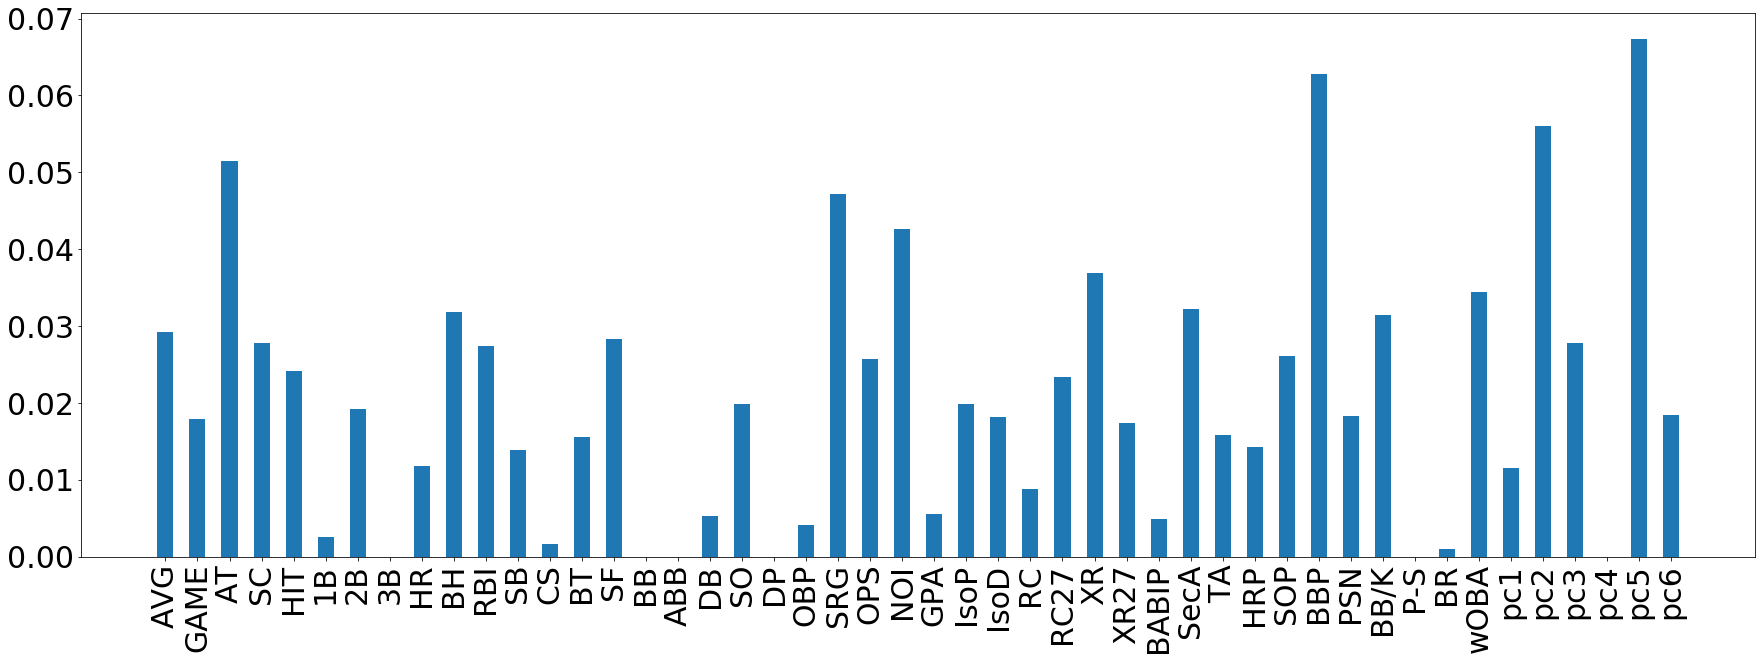

In [141]:
imp_pc_2 = clf_rf_pc_2.feature_importances_
plt.figure(figsize=(30,10))
plt.bar(x_pc_2.columns,imp_pc_2,align='center',width=0.5)
plt.xticks(rotation=90)
plt.tick_params(labelsize=30)

In [142]:
comp = pd.DataFrame(pca.components_,index=['pc{}'.format(x+1) for x in range(len(x.columns))],columns=x.columns)
comp[['SO']]

,SO
pc1,1.242329e-02
pc2,2.719244e-01
pc3,-1.787881e-01
pc4,-2.118435e-01
pc5,-2.689696e-02
pc6,-1.193961e-01
pc7,-3.297682e-01
pc8,9.374773e-02
pc9,4.291051e-02
pc10,-1.264321e-01


In [143]:
fea_imp_2 = pd.DataFrame(clf_rf_pc_2.feature_importances_,index=x_pc_2.columns,columns=['feature importance'])
fea_imp_2 = fea_imp_2.sort_values(by='feature importance',ascending=False)
fea_imp_2

,feature importance
pc5,0.067341
BBP,0.062786
pc2,0.055998
AT,0.051472
SRG,0.047144
NOI,0.042658
XR,0.036892
wOBA,0.034414
SecA,0.032280
BH,0.031879


In [144]:
fea_imp_3 = pd.DataFrame(clf_rf_pc_2.feature_importances_,index=x_pc_2.columns,columns=['feature importance'])
fea_imp_3 = fea_imp_2.sort_values(by='feature importance',ascending=False)
fea_imp_3 = pd.DataFrame(np.cumsum(np.array(fea_imp_3)),columns=['feature importance sum'],index=fea_imp_2.index)
fea_imp_3

,feature importance sum
pc5,0.067341
BBP,0.130127
pc2,0.186125
AT,0.237597
SRG,0.284741
NOI,0.327399
XR,0.364291
wOBA,0.398705
SecA,0.430985
BH,0.462864


In [145]:
feature_std = fea_imp_3.iloc[:34,0].index
feature_std

Index(['pc5', 'BBP', 'pc2', 'AT', 'SRG', 'NOI', 'XR', 'wOBA', 'SecA', 'BH',
       'BB/K', 'AVG', 'SF', 'SC', 'pc3', 'RBI', 'SOP', 'OPS', 'HIT', 'RC27',
       'IsoP', 'SO', '2B', 'pc6', 'PSN', 'IsoD', 'GAME', 'XR27', 'TA', 'BT',
       'HRP', 'SB', 'HR', 'pc1'],
      dtype='object')

In [146]:
x_pc_std = x_pc_2[feature_std]
x_pc_std

,pc5,BBP,pc2,AT,SRG,NOI,XR,wOBA,SecA,BH,...,PSN,IsoD,GAME,XR27,TA,BT,HRP,SB,HR,pc1
0,0.310184,0.460629,1.845909,1.107728,1.729062,1.605178,1.689507,1.705130,-0.273752,2.070986,...,0.722517,-0.951102,0.784581,1.229202,0.891409,-0.766121,-0.437137,0.032051,0.252255,6.852034
1,0.702034,2.504605,4.528340,1.708900,0.520749,0.772575,1.300791,0.676631,-1.452408,1.745663,...,0.473022,-1.534122,1.835207,0.361973,-0.007013,0.084616,0.339947,0.659567,-0.349276,3.715180
2,-1.989101,1.636190,1.927763,1.068942,1.081751,1.039008,1.336608,1.069725,-0.759081,1.583001,...,-0.575637,-1.159323,0.504414,0.908546,0.611101,-0.482542,-0.444299,-0.804639,0.252255,4.456899
3,-0.238730,-0.135378,-0.682592,0.293236,2.275680,1.605178,1.429310,1.823183,1.001969,1.542335,...,0.527599,-0.826169,-0.546213,1.855940,1.674833,-0.766121,-0.915384,-0.386294,1.455316,7.421312
4,-0.976187,1.191926,-1.015822,0.235058,2.318834,1.388701,1.287097,1.705701,0.447308,1.501670,...,-1.226664,-1.409189,-0.406129,1.768488,1.401712,-0.766121,-1.022278,-1.013811,2.357613,5.770454
5,3.118368,-1.356645,-1.861218,0.273843,2.592143,2.887386,2.707121,2.856086,3.858477,1.704997,...,4.507827,2.172220,-0.055920,3.240592,3.550738,-0.482542,-1.019413,2.960462,2.357613,12.894868
6,2.168839,-1.056813,-2.177580,0.157487,2.117449,2.254608,1.802224,2.284845,1.917161,1.298343,...,1.447613,1.089468,-0.336087,2.504540,2.350446,-0.482542,-0.879753,0.241223,1.154551,9.450927
7,-1.073943,0.791541,-3.873625,-1.199999,0.837212,0.955748,-0.447903,0.924345,-0.551083,-0.653599,...,-0.641909,-0.826169,-1.386714,1.039724,0.726099,-0.766121,-0.555311,-0.804639,-0.349276,1.036115
8,-2.504402,-0.685680,-1.512231,-0.307937,-0.313563,1.022356,-0.026531,0.645240,-0.703615,-0.409606,...,-0.602926,0.464804,0.224247,0.157919,0.208608,2.353250,1.808171,-0.177122,-0.950807,0.904791
9,3.406330,-0.639974,1.211167,0.448377,0.506364,1.055660,0.749847,0.906350,-0.454017,0.647696,...,1.112354,-0.034927,0.364330,0.434849,0.064860,0.651775,-0.367307,1.496257,-0.048511,3.349765


In [147]:
x_train_pc_std,x_test_pc_std,y_train_pc_std,y_test_pc_std=train_test_split(x_pc_std,y,test_size=0.25)

In [148]:
clf_rf_pc_std = RandomForestClassifier()
clf_rf_pc_std.fit(x_train_pc_std,y_train_pc_std)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
pre_rf_pc_std = clf_rf_pc_std.predict(x_test_pc_std)
acc_rf_pc_std = accuracy_score(y_test_pc_std,pre_rf_pc_std)
auc_rf_pc_std = roc_auc_score(y_test_pc_std,pre_rf_pc_std)
score_list_std = [acc_rf_pc_std,auc_rf_pc_std]
for i in range(2):
    print('\t{0:5s} : {1:>.6f}'.format(score_name[i],score_list_std[i]))
    

	正解率   : 0.645161
	ＡＵＣ   : 0.454545


In [150]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators':[20,40,60,80,100],
    'max_depth':[2,4,6],
    'max_features':[10,20,30]
}
grid_rf = GridSearchCV(rf,rf_params)
grid_rf.fit(x_train_pc_std,y_train_pc_std)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [151]:
grid_rf.best_params_

{'max_depth': 2, 'max_features': 10, 'n_estimators': 40}

In [152]:
grid_rf.best_score_

0.8172043010752689

In [153]:
pre_grid_rf = grid_rf.predict(x_test_pc_std)
acc_grid_rf = accuracy_score(y_test_pc_std,pre_grid_rf)
auc_grid_rf = roc_auc_score(y_test_pc_std,pre_grid_rf)
score_list_grid_rf = [acc_grid_rf,auc_grid_rf]
for i in range(2):
    print('\t{0:5s} : {1:>.6f}'.format(score_name[i],score_list_grid_rf[i]))

	正解率   : 0.709677
	ＡＵＣ   : 0.500000


In [154]:
en = ElasticNet()
en.fit(x_train_pc_std,y_train_pc_std)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [155]:
xgc = xgb.XGBClassifier()

In [156]:
xgc.fit(x_train_pc_std,y_train_pc_std)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [157]:
pre_xg = xgc.predict(x_test_pc_std)
acc_xg = accuracy_score(y_test_pc_std,pre_xg)
auc_xg = roc_auc_score(y_test_pc_std,pre_xg)
score_list_xg = [acc_xg,auc_xg]
for i in range(2):
    print('\t{0:5s} : {1:>.6f}'.format(score_name[i],score_list_xg[i]))

	正解率   : 0.741935
	ＡＵＣ   : 0.555556


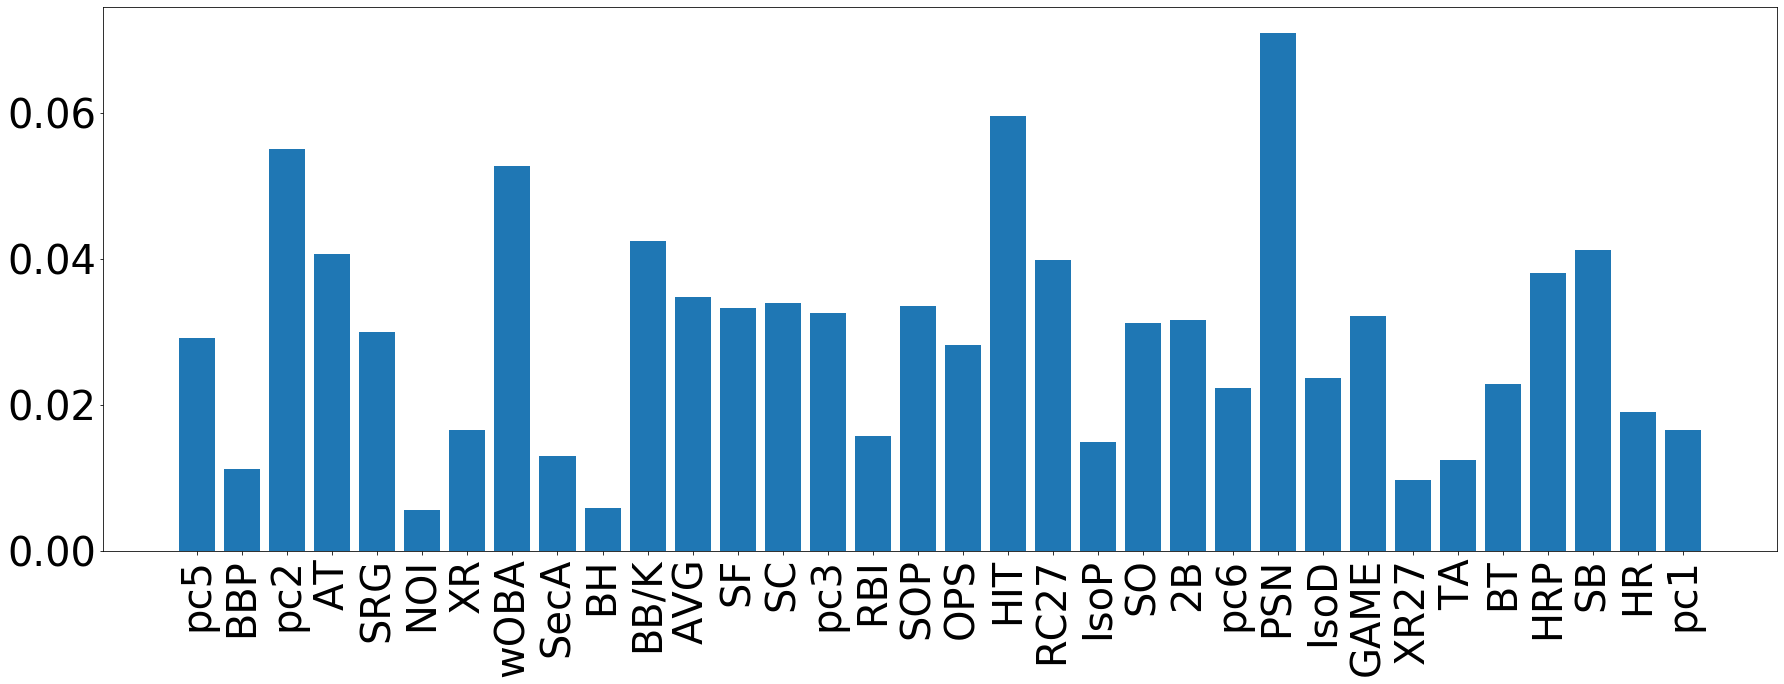

In [158]:
plt.figure(figsize=(30,10))
plt.bar(x_pc_std.columns,clf_rf_pc_std.feature_importances_,align='center')
plt.xticks(rotation=90)
plt.tick_params(labelsize=40)

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.25)
lda = LDA()
x_ld_train = lda.fit_transform(x_train,y_train)
rf_ld = RandomForestClassifier()
rf_ld.fit(x_ld_train,y_train)
x_ld_test = lda.transform(x_test)
pre_ld = rf_ld.predict(x_ld_test)
acc_ld = accuracy_score(y_test,pre_ld)
auc_ld = roc_auc_score(y_test,pre_ld)
print('{0:5s} : {1:.6f}'.format('正解率',acc_ld))
print('{0:5s} : {1:.6f}'.format('ＡＵＣ',auc_ld))

正解率   : 0.677419
ＡＵＣ   : 0.589286
